<a href="https://colab.research.google.com/github/EAFIT-BI/Business-Analytics---2025-I/blob/main/Regresi%C3%B3n_log%C3%ADstica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
# Importamos librerías
import  numpy as np # manejo numérico
import pandas as pd # manejo de tablas
import matplotlib.pyplot as plt # gráficos simples
import seaborn as sns # gráficos avanzados
# Librería con regresión logística
from sklearn.linear_model import LogisticRegression
# Librería para particionamiento de datos
from sklearn.model_selection import train_test_split
# Librería para métricas de desempeño
from sklearn.metrics import confusion_matrix, accuracy_score, \
classification_report

In [37]:
# Configuramos los gráficos para efectos estétic
sns.set_theme(style = "whitegrid", palette = "pastel")

In [38]:
# Creamos los datos para el análisis
data = pd.DataFrame({'Edad': [22, 25, 47, 52, 46, 56, 60, 62,
                              61, 18, 28, 35],
                     'Ingresos': [20000, 22000, 70000, 80000,
                                  50000, 90000, 100000,
                                  120000, 130000, 18000, 30000,
                                  40000],
                     'Compra': [0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0]
                     })

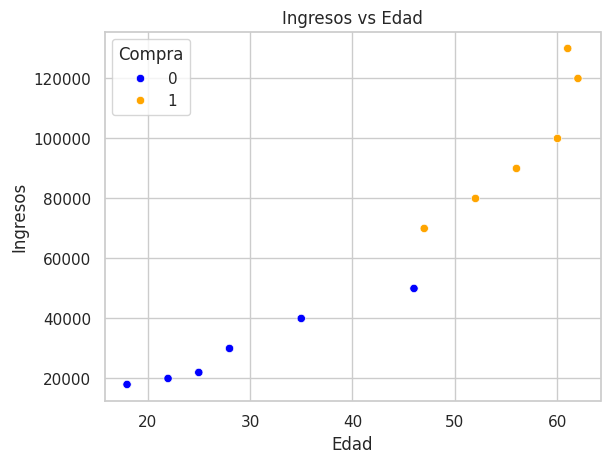

In [39]:
# Graficamos la relación entre las variables predictoras
# y la variable objetivo

sns.scatterplot(data = data, x = 'Edad', y = 'Ingresos',
                hue = 'Compra', palette = ['blue', 'orange'])
plt.title("Ingresos vs Edad");
plt.show();

In [40]:
# Creamos la matriz de características
X = data.drop('Compra', axis = 1)
# Creamos el vector objetivo
y = data['Compra']

In [41]:
# Particionamos los datos en entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state = 42,
                                                    stratify = y)

In [42]:
# Preprocesamos los datos con min y max

# Cargamos la librería que tiene la función que requerimos
from sklearn.preprocessing import MinMaxScaler

# Instanciamos el preprocesador
scaler = MinMaxScaler()

# Ajustamos el preprocesador con los datos de entrenamiento
scaler.fit(X_train)

# Transformamos los datos de entrenamiento
X_train = scaler.transform(X_train)

# Transformamos los datos de test
X_test = scaler.transform(X_test)


In [43]:
# Instanciamos el modelo
modelo = LogisticRegression()

In [44]:
# Entrenamos el modelo con el conjunto de entrenamiento
modelo.fit(X_train, y_train)

LogisticRegression()

In [45]:
# Validamos el modelo

y_pred = modelo.predict(X_test)

print("Acierto de clasificación: ", accuracy_score(y_test, y_pred))
print("\nMatriz de Confusión: \n", confusion_matrix(y_test, y_pred))
print("\nReporte de Clasificación: \n",
      classification_report(y_test, y_pred))

Acierto de clasificación:  1.0

Matriz de Confusión: 
 [[2 0]
 [0 1]]

Reporte de Clasificación: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



In [46]:
data

,Edad,Ingresos,Compra
0,22,20000,0
1,25,22000,0
2,47,70000,1
3,52,80000,1
4,46,50000,0
5,56,90000,1
6,60,100000,1
7,62,120000,1
8,61,130000,1
9,18,18000,0


# Base datos WDBC

Consta de 569 pacientes con 30 características cada uno. El objetivo es determinar si la masa examinada para cada paciente es cancerosa o no.

In [50]:
# Almacenamos la ruta de la base de datos
ruta = 'http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data'

# Generamos los nombres de las columnas
cols = ['ID', 'Diagnosis', 'radius_mean', 'texture_mean',
        'perimeter_mean', 'area_mean', 'smoothness_mean',
        'compactness_mean', 'concavity_mean', 'concave_points_mean',
        'simmetry_mean', 'fractal_dim_mean',
        'radius_sd', 'texture_sd', 'perimeter_sd',
        'area_sd', 'smoothness_sd', 'compactness_sd',
        'concavity_sd', 'concave_points_sd', 'simmetry_sd',
        'fractal_dim_sd', 'radius_worst', 'texture_worst',
        'perimeter_worst', 'area_worst', 'smoothness_worst',
        'compactness_worst', 'concavity_worst',
        'concave_points_worst', 'simmetry_worst',
        'fractal_dim_worst']

# Cargamos la base de datos
data = pd.read_csv(ruta, header = None)

In [51]:
data.columns = cols
data.head()

,ID,Diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,simmetry_worst,fractal_dim_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
